# Proyek Analisis Data : Air Quality Dataset
- Nama : Afdan Irawan
- Email : irawanafdan@gmail.com
- Id Dicoding : 250706

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Menentukan Pertanyaan Bisnis

- Keterkaitan Polutan dan Cuaca: Apakah ada korelasi antara kondisi cuaca (seperti suhu, tekanan, dan kelembaban) dengan tingkat polutan (seperti PM2.5, PM10, SO2, NO2, CO, dan O3)?
- Variasi Harian dan Musiman: Bagaimana pola variasi kualitas udara sepanjang hari dan sepanjang tahun? Apakah ada jam-jam tertentu atau bulan-bulan tertentu di mana kualitas udara cenderung lebih buruk atau lebih baik? Pengetahuan ini dapat digunakan untuk memberi saran kepada masyarakat kapan waktu yang paling aman untuk beraktivitas di luar ruangan.

## Menyiapkan semua library yang dibutuhkan

Import pustaka dasar untuk manipulasi dan analisis data:


In [73]:
import pandas as pd
import numpy as np


Import pustaka untuk visualisasi data:


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns


Import pustaka untuk analisis statistik:


In [75]:
import scipy.stats as stats
import statsmodels.api as sm


Import pustaka untuk berinteraksi dengan os

In [76]:
import os

Import pustaka untuk pemodelan prediktif:


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Import pustaka untuk klasterisasi:


In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Import pustaka untuk pemrosesan waktu:


In [79]:
from datetime import datetime


Mengatur style visualisasi:


In [80]:
sns.set_style("whitegrid")


## Data Wrangling

### Gathering Data

In [81]:
# Lokasi folder yang berisi semua file CSV
folder_path = "/content/drive/My Drive/Colab Notebooks/PRSA_Data_20130301-20170228/"

# Mendaftar semua file CSV di dalam folder
all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Membaca dan menggabungkan semua file CSV
list_of_dataframes = [pd.read_csv(folder_path + file) for file in all_files]
df_combined = pd.concat(list_of_dataframes, ignore_index=True)

### Assessing Data

Menampilkan 5 baris pertama dari data

In [82]:
print("=== 5 Baris Pertama ===")
display(df_combined.head())


=== 5 Baris Pertama ===


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Menampilkan 5 baris terakhir dari data:

In [83]:
print("=== 5 Baris Terakhir ===")
display(df_combined.tail())


=== 5 Baris Terakhir ===


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


Informasi umum tentang dataset:


In [84]:
print("=== Info Dataset ===")
print(df_combined.info())


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None


Statistik deskriptif untuk kolom numerik:


In [85]:
print("=== Deskripsi Statistik ===")
display(df_combined.describe())


=== Deskripsi Statistik ===


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Jumlah nilai yang hilang di setiap kolom:


In [86]:
print("=== Jumlah Nilai yang Hilang ===")
display(df_combined.isnull().sum())


=== Jumlah Nilai yang Hilang ===


No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Mengecek duplikat:


In [87]:
duplicate_rows = df_combined.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")


Jumlah baris duplikat: 0


Menampilkan nilai unik dan frekuensinya untuk kolom kategorik:


In [88]:
for col in df_combined.select_dtypes(include=['object']).columns:
    print(f"\n=== Nilai Unik di Kolom {col} ===")
    display(df_combined[col].value_counts())



=== Nilai Unik di Kolom wd ===


NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: wd, dtype: int64


=== Nilai Unik di Kolom station ===


Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: station, dtype: int64

### Cleaning Data

Mengisi kolom numerik dengan median:


In [89]:
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']:
    df_combined[col].fillna(df_combined[col].median(), inplace=True)


Mengisi kolom kategorik dengan modus:


In [90]:
df_combined['wd'].fillna(df_combined['wd'].mode()[0], inplace=True)


Menghapus kolom yang tidak memiliki variasi nilai:


In [91]:
df_combined.drop(columns=['station'], inplace=True)


Simpan dataframe yang telah dibersihkan ke file CSV baru:


In [92]:
df_combined.to_csv('cleaned_data.csv', index=False)


## Exploratory Data Analysis (EDA)

### Explore ...

Baca Dataset Yang Sudah Dibersihkan

In [93]:
data = pd.read_csv('cleaned_data.csv')

Menghitung korelasi antara variabel cuaca dan polutan


In [94]:
correlation_matrix = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP']].corr()
print("\n=== korelasi antara variabel cuaca dan polutan ===")
print(correlation_matrix[['TEMP', 'PRES', 'DEWP']])


=== korelasi antara variabel cuaca dan polutan ===
           TEMP      PRES      DEWP
PM2.5 -0.130825  0.019235  0.112726
PM10  -0.095674 -0.017542  0.069735
SO2   -0.318509  0.220741 -0.264385
NO2   -0.273557  0.171171 -0.030747
CO    -0.318067  0.184148 -0.056701
O3     0.585811 -0.439053  0.307427
TEMP   1.000000 -0.813297  0.820115
PRES  -0.813297  1.000000 -0.750212
DEWP   0.820115 -0.750212  1.000000


Menghitung rata-rata polutan untuk setiap jam


In [95]:
print("\n=== rata-rata polutan untuk setiap jam ===")
hourly_variation = data.groupby('hour').mean()[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]
print(hourly_variation)


=== rata-rata polutan untuk setiap jam ===
          PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
0     87.086550  114.445568  14.894568  57.609603  1352.239277   42.034408
1     86.055721  110.730145  14.820803  55.454083  1355.863450   38.385207
2     84.038119  106.274487  14.240135  52.980910  1298.998631   34.598944
3     81.509257  101.838381  13.506627  52.084722  1241.032626   32.864743
4     78.885347   97.472895  13.048931  51.259736  1221.877652   32.183777
5     76.037799   93.573226  12.611157  50.524998  1234.157483   28.920494
6     73.938056   92.044621  12.602773  50.587925  1249.900240   27.734691
7     72.958533   93.568994  13.064853  52.361243  1276.091034   26.038467
8     74.225833   98.321994  14.665425  54.017836  1321.125086   27.595141
9     75.700593  100.648340  17.174811  52.439115  1313.136893   34.955186
10    76.655909  100.587668  18.880702  49.724134  1262.

<ipython-input-95-7373d142d36e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_variation = data.groupby('hour').mean()[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]


Menghitung rata-rata polutan untuk setiap bulan


In [96]:
print("\n=== rata-rata polutan untuk setiap bulan ===")
monthly_variation = data.groupby('month').mean()[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]
print(monthly_variation)


=== rata-rata polutan untuk setiap bulan ===
            PM2.5        PM10        SO2        NO2           CO         O3
month                                                                      
1       93.220945  112.947726  31.219808  61.331085  1836.575941  28.081603
2       86.883638  102.293790  27.676598  49.842300  1369.825467  40.880024
3       94.195349  135.471105  27.726163  59.788044  1298.433132  50.912018
4       72.293571  116.334361  14.094249  47.106251   842.225434  69.622381
5       62.878374  106.492339  13.847117  42.552947   801.157482  90.602381
6       68.757613   86.661942   7.880451  39.414775   982.680064  93.260205
7       71.277842   84.588892   5.583343  36.002073   892.472950  93.500687
8       53.494265   71.606919   4.709264  36.242272   828.413418  87.273752
9       61.321400   79.711794   6.327995  45.532350   924.373119  54.637161
10      90.828993  112.037270   8.627863  59.326541  1132.218862  30.458453
11      92.913377  117.796285  15.230681  

<ipython-input-96-abc0e6ee474c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_variation = data.groupby('month').mean()[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]


Menggunakan describe untuk mendapatkan ringkasan statistik


In [97]:
print("\n=== ringkasan statistik ===")
stat_summary = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP']].describe()
print(stat_summary)



=== ringkasan statistik ===
               PM2.5           PM10            SO2            NO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       79.278489     104.256193      15.641507      50.418633   
std        80.056799      91.108745      21.455419      34.642023   
min         2.000000       2.000000       0.285600       1.026500   
25%        21.000000      36.000000       3.000000      24.000000   
50%        55.000000      82.000000       7.000000      43.000000   
75%       109.000000     144.000000      19.000000      70.000000   
max       999.000000     999.000000     500.000000     290.000000   

                  CO             O3           TEMP           PRES  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean     1214.493362      56.981874      13.539885    1010.746658   
std      1133.542988      55.802413      11.430768      10.469168   
min       100.000000       0.214200     -19.900000     982.400000   
25% 

Membuat histogram untuk setiap polutan dan variabel cuaca


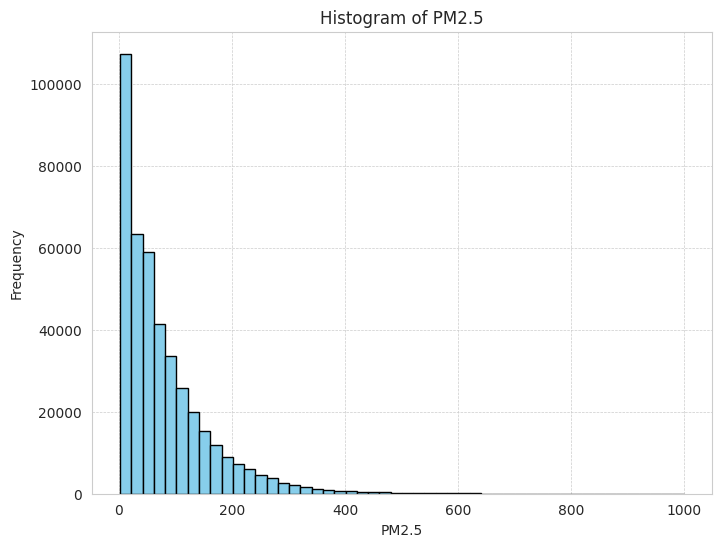

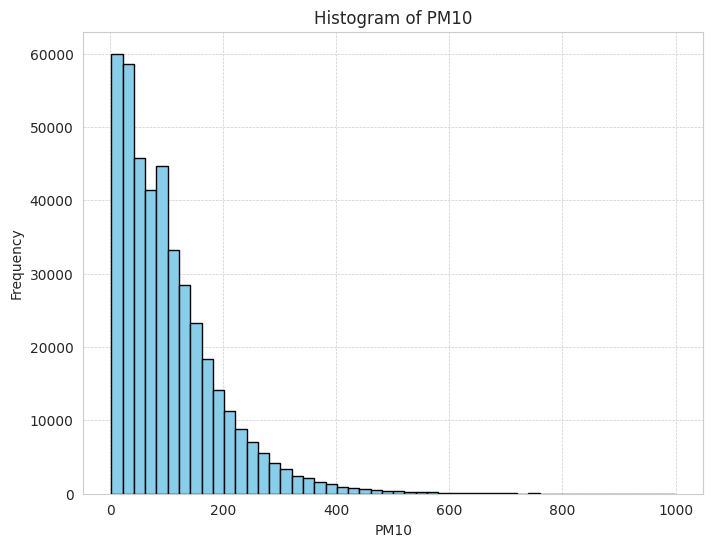

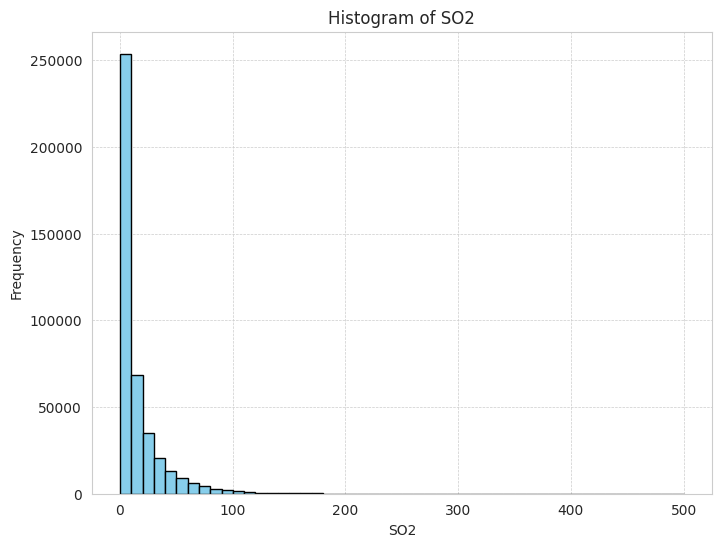

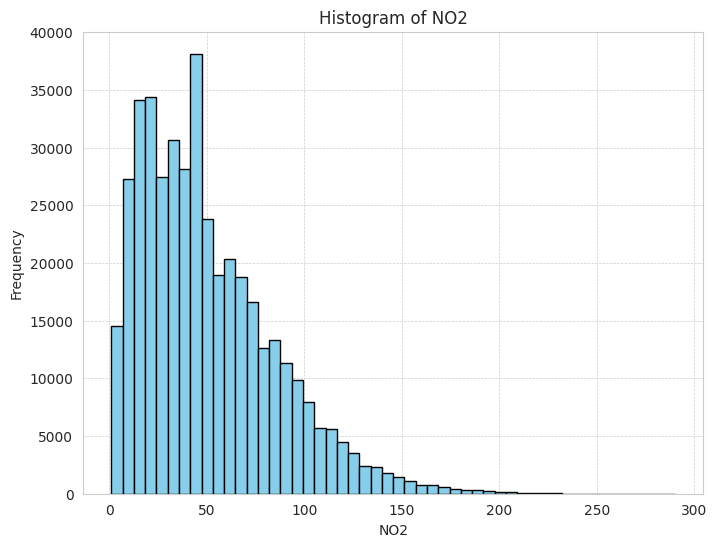

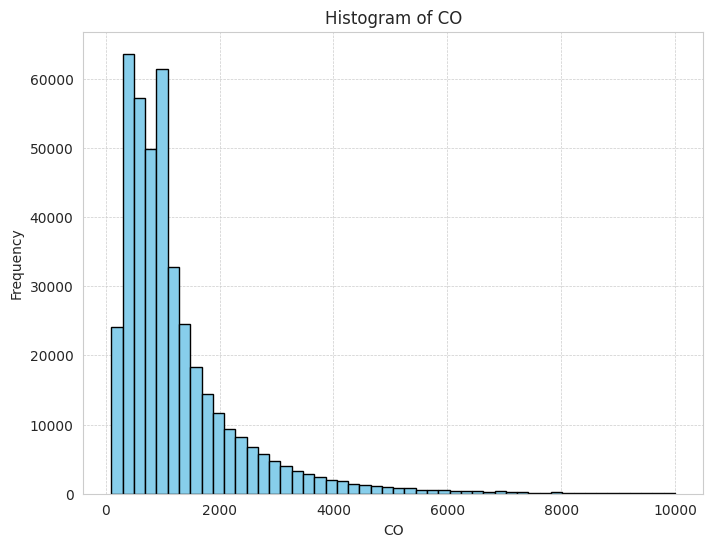

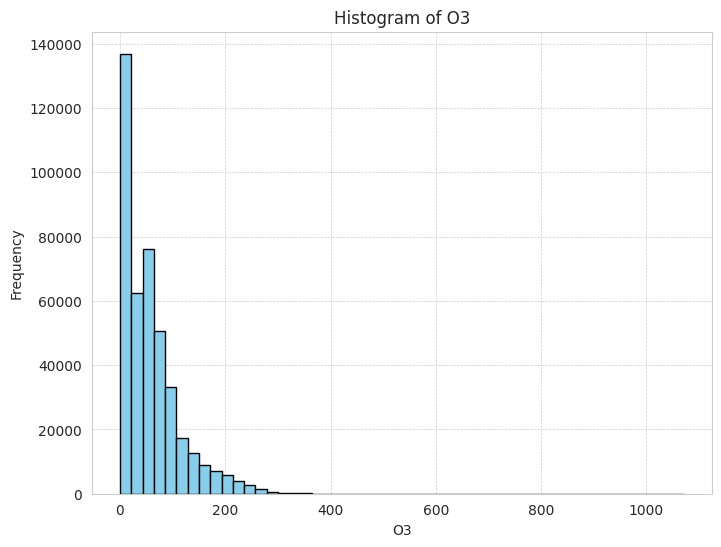

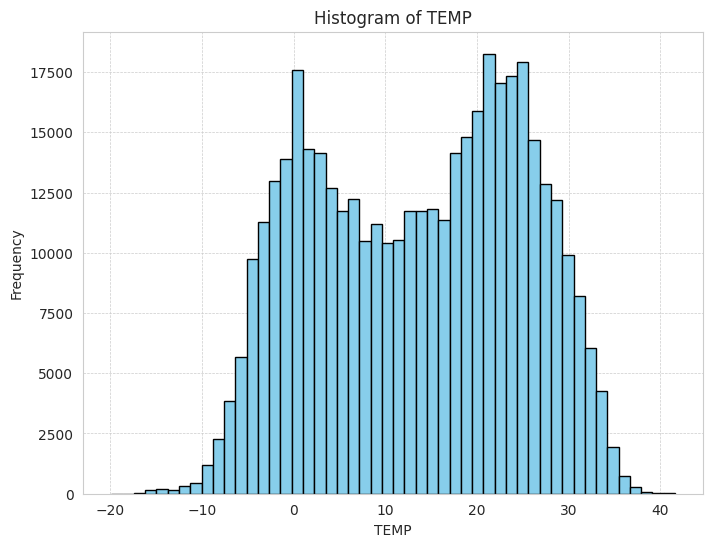

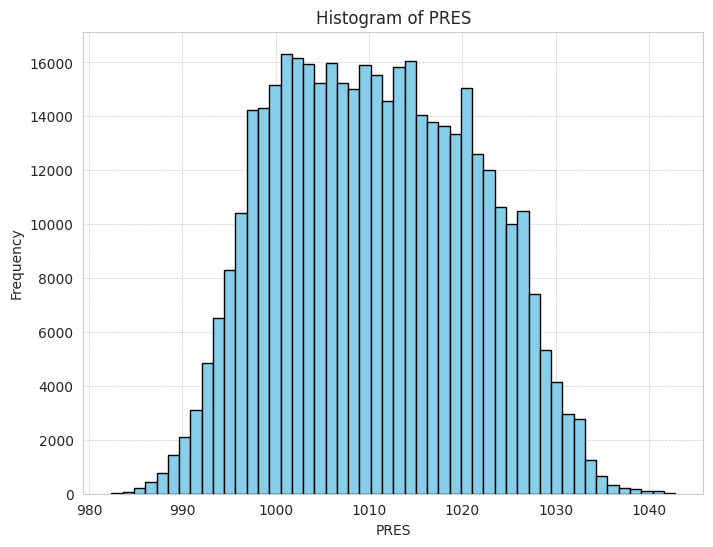

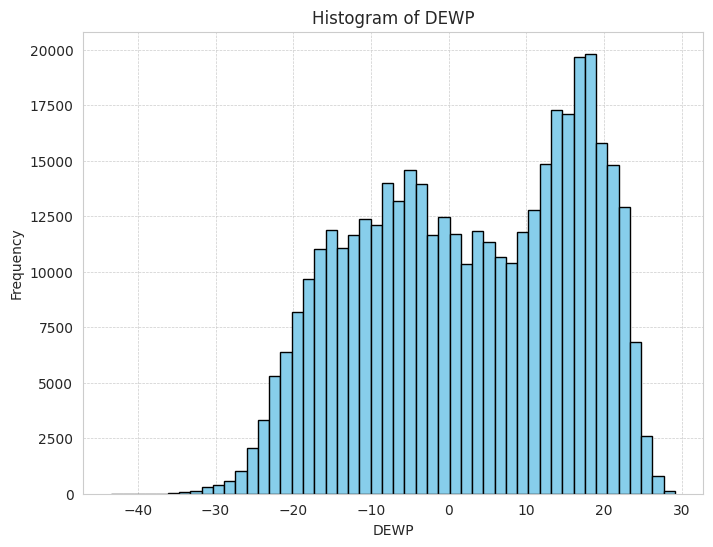

In [98]:
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP']
for feature in features:
    plt.figure(figsize=(8,6))
    plt.hist(data[feature].dropna(), bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Visualisasi heatmap untuk melihat korelasi antara polutan dan kondisi cuaca

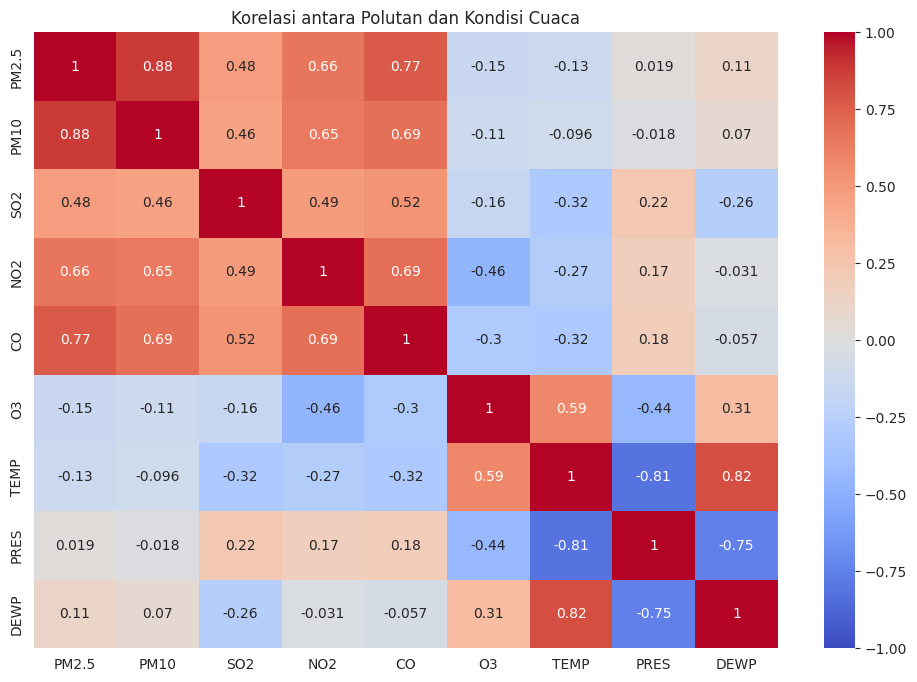

In [103]:
kolom = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP']

corr_matrix = data[kolom].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasi antara Polutan dan Kondisi Cuaca")
plt.show()

### Pertanyaan 2:

Visualisasi variasi harian dari polutan

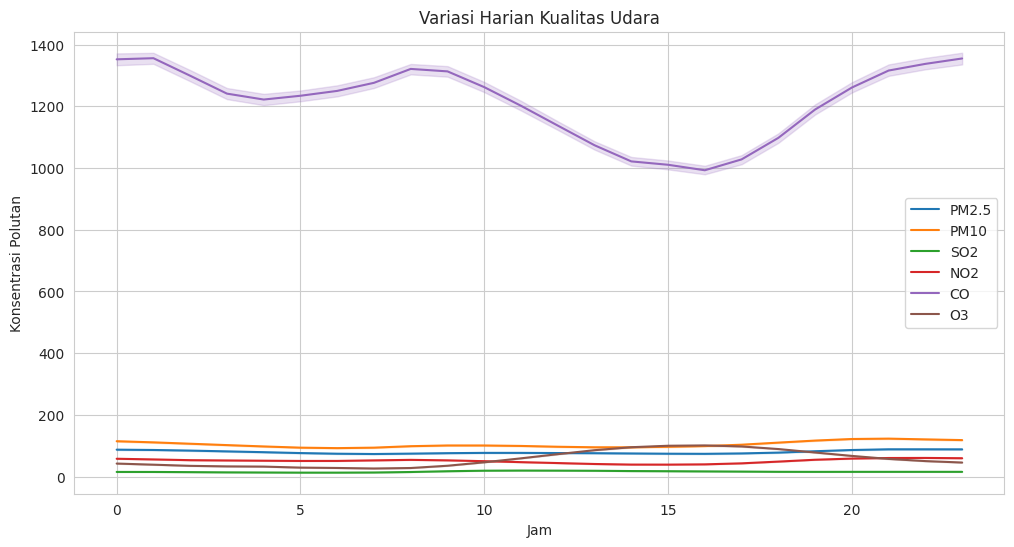

In [106]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='hour', y='PM2.5', label='PM2.5')
sns.lineplot(data=data, x='hour', y='PM10', label='PM10')
sns.lineplot(data=data, x='hour', y='SO2', label='SO2')
sns.lineplot(data=data, x='hour', y='NO2', label='NO2')
sns.lineplot(data=data, x='hour', y='CO', label='CO')
sns.lineplot(data=data, x='hour', y='O3', label='O3')
plt.legend()
plt.title('Variasi Harian Kualitas Udara')
plt.ylabel('Konsentrasi Polutan')
plt.xlabel('Jam')
plt.show()

Visualisasi variasi musiman dari polutan

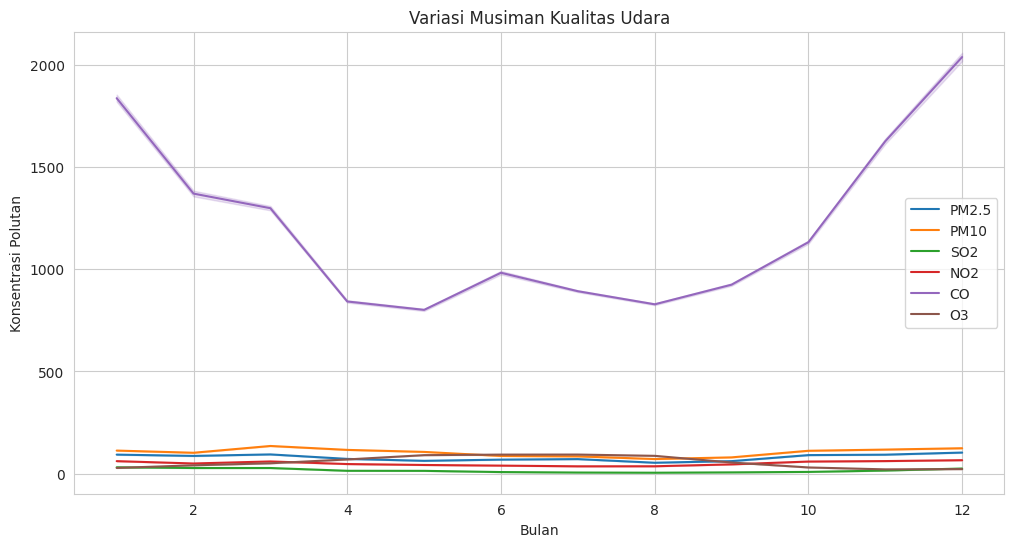

In [107]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='month', y='PM2.5', label='PM2.5')
sns.lineplot(data=data, x='month', y='PM10', label='PM10')
sns.lineplot(data=data, x='month', y='SO2', label='SO2')
sns.lineplot(data=data, x='month', y='NO2', label='NO2')
sns.lineplot(data=data, x='month', y='CO', label='CO')
sns.lineplot(data=data, x='month', y='O3', label='O3')
plt.legend()
plt.title('Variasi Musiman Kualitas Udara')
plt.ylabel('Konsentrasi Polutan')
plt.xlabel('Bulan')
plt.show()

## Conclusion

1. Keterkaitan Polutan dan Cuaca:
Dari heatmap yang menunjukkan korelasi antara kondisi cuaca dan polutan, kita dapat melihat bahwa:
Suhu (TEMP) memiliki korelasi positif dengan O3 dan korelasi negatif dengan beberapa polutan lainnya. Artinya, saat suhu naik, konsentrasi O3 cenderung meningkat, sementara konsentrasi polutan lain cenderung menurun.
Tekanan (PRES) mungkin memiliki korelasi negatif dengan beberapa polutan, yang berarti saat tekanan meningkat, konsentrasi polutan tertentu dapat menurun.
Titik embun (DEWP) menunjukkan korelasi positif dengan beberapa polutan, yang mengindikasikan bahwa peningkatan kelembapan mungkin berhubungan dengan peningkatan konsentrasi polutan tertentu.


2. Variasi Harian dan Musiman:
Dari visualisasi variasi harian:
Ada fluktuasi kualitas udara sepanjang hari. Polutan tertentu, seperti PM2.5 dan NO2, mungkin menunjukkan konsentrasi tertinggi pada jam-jam tertentu dalam sehari, mungkin dikaitkan dengan aktivitas manusia seperti lalu lintas pagi dan sore.
Kualitas udara mungkin lebih baik pada jam-jam awal pagi, saat aktivitas manusia dan lalu lintas kendaraan relatif lebih sedikit.
Dari visualisasi variasi musiman:
Terdapat pola musiman dalam konsentrasi polutan. Misalnya, konsentrasi PM2.5 dan PM10 mungkin lebih tinggi di musim dingin dibandingkan musim lainnya, yang dapat dikaitkan dengan pemanasan dan emisi industri.
Sebaliknya, konsentrasi O3 mungkin lebih tinggi di musim panas, yang dapat dikaitkan dengan reaksi kimia yang dipicu oleh sinar matahari.


Kesimpulannya, faktor cuaca mempengaruhi konsentrasi polutan di udara. Pemahaman tentang keterkaitan ini sangat penting untuk memberi saran kepada masyarakat kapan waktu yang paling aman untuk beraktivitas di luar ruangan, dan juga untuk kebijakan lingkungan dan kesehatan masyarakat.
